In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import os

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##### Google Colab #####
# Specify directory of course materials in Google Drive
module_dir = (
    "/content/drive/My Drive/3359 project/"
)
import sys
sys.path.append(module_dir)

In [ ]:
# Load the data
tweets_df = pd.read_csv('/content/drive/My Drive/3359 project/COMP__3359__GROUP8-main/data//labelled_newscatcher_dataset.csv', sep=';')
tweets_df.head()

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en


In [ ]:
tweets_df.describe()

,topic,link,domain,published_date,title,lang
count,108774,108774,108774,108774,108774,108774
unique,8,106130,5164,68743,103180,1
top,TECHNOLOGY,https://www.google.com/,dailymail.co.uk,2020-08-04 01:00:00,"US tops 5 million confirmed virus cases, to Eu...",en
freq,15000,19,1855,41,21,108774


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


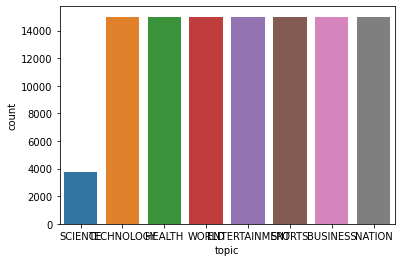

In [ ]:
sns.countplot(tweets_df['topic'], label='count')

In [ ]:
tweets_df = tweets_df.sample(frac=0.01, replace=False, random_state=1).reset_index().drop(columns = ["index"])

In [ ]:
sentences = tweets_df['title'].to_list()
sentences[:10]
single_sentence = ' '.join(sentences)
single_sentence[:500]

"Indonesia reports 1893 newly-confirmed COVID-19 cases Bindi Irwin announces she's pregnant with first baby five months after zoo wedding Human trials of coronavirus vaccine set to begin in Indonesia DJ Black Coffee refuses to apologise for albinism ‘jab’ Immigration cripples syndicate which sold about 30000 fake documents A-level and GCSE results: 'Improved' schools can challenge grades NDC Deputy Youth Organizer Jabs Akufo-Addo For Naming A Project After Himself Former AOA member Mina hospitali"

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# let imprt the stopwords and see them
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['title']).toarray()

In [ ]:
vectorizer.get_feature_names()[:10]
tweets_countvectorizer
tweets_countvectorizer.shape

(1088, 5754)

In [ ]:
X = tweets_countvectorizer
y = tweets_df['topic']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

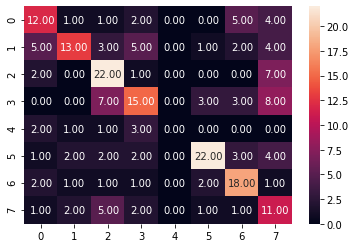

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='.2f')

In [ ]:
print(classification_report(y_test, y_predict_test))

               precision    recall  f1-score   support

     BUSINESS       0.48      0.48      0.48        25
ENTERTAINMENT       0.65      0.39      0.49        33
       HEALTH       0.52      0.69      0.59        32
       NATION       0.48      0.42      0.45        36
      SCIENCE       0.00      0.00      0.00         7
       SPORTS       0.76      0.61      0.68        36
   TECHNOLOGY       0.56      0.69      0.62        26
        WORLD       0.28      0.48      0.35        23

     accuracy                           0.52       218
    macro avg       0.47      0.47      0.46       218
 weighted avg       0.53      0.52      0.51       218



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
print(f"Accuracy: {accuracy*100}%") #the total accuracy in the above report

Accuracy: 52.0%
